##  Assignment 8. Task 3. Hill Climbing with Simulated Annealing

In this task we are going to implement another variant of the hill climbing algorithm to solve the travelling salesman problem - simulated annealing algorithm.

In [81]:
from math import sqrt, exp
import random

Code below contains implemented methods from the previous assignment (you may replace it with your solution). We will reuse these methods for the simulated annealing algorithm.

In [88]:
# read file on input and returns the list of coordinates [[x1, y1], [..],...]
def read_file(file_name):
    f = open(file_name, "r")
    print('The number of cities are: ' + f.readline())
    coords = []
    for line in f:
        x, y = line.split()
        coords.append([float(x), float(y)])
    return coords

# The function calculates the euclidean distance between cities 
# returns a 2x2 matrix of distances between cities
def distance_matrix(coordinates):
    distances = []
    for [x, y] in coordinates:
        cur_distances = []
        for [x1, y1] in coordinates:
            dist = sqrt((x - x1)**2 + (y - y1)**2)
            cur_distances.append(dist)
        distances.append(cur_distances)
    return distances

# Sum up the total length of the tour based on the distance matrix
def path_length(distances, path):
    length = 0
    n_cities = len(list(path))
    for i in range(n_cities):
        # for the last city, the distance to the first city should be added
        j = (i+1) % n_cities
        city_i = path[i]
        city_j = path[j]
        length += distances[city_i][city_j]
    return length

# Generate random valid path, that goes through each city exactly once
def init_random_path(path_length):
    path = list(range(path_length))
    random.shuffle(path)
    return path

# Return the list of all paths, where 2 cities of the input path were swapped 
def get_neighbours(path):
    neighbours = []
    for i in range(len(path)):
        for j in range(i + 1, len(path)):
            neighbour = path.copy()
            neighbour[i] = path[j]
            neighbour[j] = path[i]
            neighbours.append(neighbour)
    return neighbours

# Find the most optimal path among the neighbours
# Returns best path and its length
def best_solution(neighbours):
    best_length = objective_function(neighbours[0])
    best_neighbour = neighbours[0]
    for neighbour in neighbours:
        current_length = objective_function(neighbour)
        if current_length < best_length:
            best_length = current_length
            best_neighbour = neighbour
    return best_neighbour, best_length

In [89]:
# Start with the random path
# Investgate the neighbours of the current path, update solution if you find the more optimal one
# Return the best path and the corresponding length
def hill_climbing():
    cur_path = init_function()
    cur_length = objective_function(cur_path)
    neighbours = get_neighbours(cur_path)
    best_neighbour, best_length = best_solution(neighbours)

    # if any of the neighbour path represents more optimal solution, continue
    while best_length < cur_length:
        cur_path = best_neighbour
        cur_length = best_length
        neighbours = get_neighbours(cur_path)
        best_neighbour, best_length = best_solution(neighbours)        
    return cur_path, cur_length

# Restart hill_climbing the required number of times (defined in iterations variable);
# Return the best result
def random_restart(iterations):
    global_best_path, global_best_length = hill_climbing()
    for i in range(iterations):
        cur_path, cur_length = hill_climbing()
        if (cur_length < global_best_length):
            global_best_length = cur_length
            global_best_path = cur_path
    return global_best_path, global_best_length

### Task. Implement simulated annealing

In [90]:
# Implement method to generate 1 random neighbour from the current path
def generate_path(path):
    new_path = path[:]
    index = random.sample(range(len(new_path) - 1), 2)
    new_path[index[0]], new_path[index[1]] = new_path[index[1]], new_path[index[0]]
    return new_path

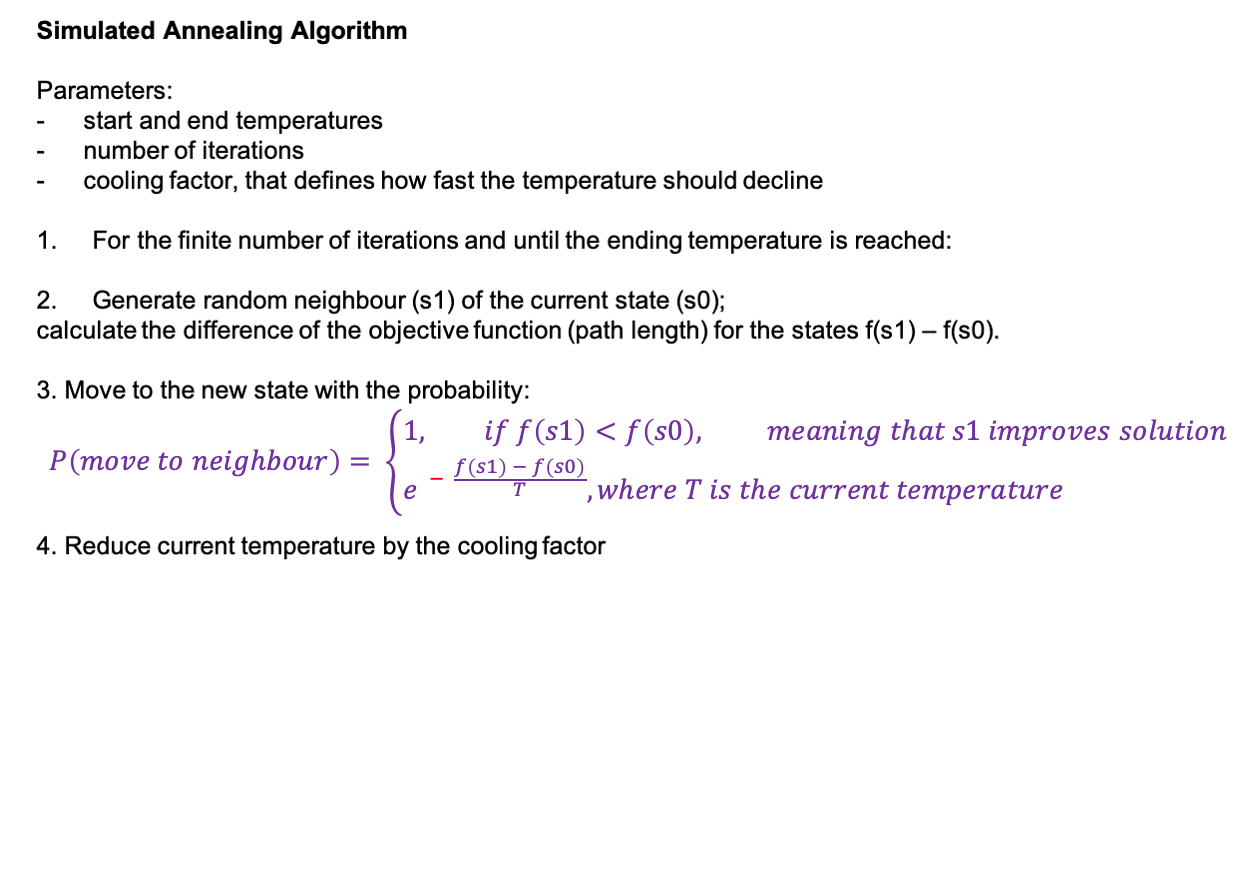

In [2]:
from IPython.display import Image
Image('/Users/Zarbali/Documents/Advanced_ML/alg.png')

In [86]:
def simulated_annealing(temp_start, temp_end, cooling_factor, n_iterations):
    
    best_path = init_function()
    best_length = objective_function(best_path)
    
    iteration = 0
    temp = temp_start
    while temp > temp_end and iteration < n_iterations:
        current_path = best_path[:]
        current_length = best_length
        
        new_path = generate_path(best_path)
        new_length = objective_function(new_path)
        
        length_difference = new_length - best_length
        try:
            probability = exp(-length_difference/temp)
        except OverflowError:
            probability = float('inf')
        
        if iteration % 10000 == 0:
            print(f"Loss: {current_length:.2f} Diff: {length_difference:.2f} Temp: {temp} Prob: {probability}")
        
        if length_difference < 0 or probability > random.random():
            best_path = new_path
            best_length = new_length
        
        else:
            best_path = current_path[:]
            best_length = current_length
            
        temp = temp * cooling_factor
        iteration = iteration + 1
        print("temperature is: ",temp)
    
    print("number of iterations: ", iteration)
    return best_path, best_length

In [87]:
file_name = '/Users/Zarbali/Documents/Advanced_ML/Assignment7/input_coordinates_48.txt'
coordinates = read_file(file_name)
distances = distance_matrix(coordinates)

# You may use lambda functions below to separate the logic of the algorithm from the problem domain 
# (the particular instance of the coordinates and distances)
init_function = lambda: init_random_path(len(coordinates))
objective_function = lambda path: path_length(distances, path)

best_path, best_length = hill_climbing()
print("best path is: ", best_path)
print("min length is: ", best_length)
print()

print("Hill Climbing with simulated annealing")
temp_start = 1000
temp_end = 0.00000001
cooling_factor = 0.9999
n_iterations = 100000
best_path, best_length = simulated_annealing(temp_start, temp_end, cooling_factor, n_iterations)
print("best path is: ", best_path)
print("min length is: ", best_length)
print()

print("Hill Climbing with random restart")
iterations = 100
best_path, best_length = random_restart(iterations)
print("best path is: ", best_path)
print("min length is: ", best_length)


The number of cities are: 48

best path is:  [24, 13, 33, 40, 28, 1, 3, 25, 47, 46, 19, 35, 27, 6, 17, 43, 30, 45, 14, 39, 2, 21, 15, 0, 7, 8, 37, 5, 36, 18, 26, 16, 42, 29, 32, 11, 10, 22, 4, 41, 9, 34, 44, 23, 31, 38, 20, 12]
min length is:  42799.735047948474

Hill Climbing with simulated annealing
Loss: 169448.37 Diff: 3849.43 Temp: 1000 Prob: 0.021291832739095667
Loss: 50179.35 Diff: 16418.12 Temp: 367.86104643297176 Prob: 4.138721702745475e-20
Loss: 40918.63 Diff: 6825.48 Temp: 135.3217494827602 Prob: 1.2435950185145368e-22
Loss: 39685.75 Diff: 3751.99 Temp: 49.779600369868334 Prob: 1.8462883965486727e-33
Loss: 39481.83 Diff: 16407.42 Temp: 18.311975883074872 Prob: 0.0
Loss: 39481.83 Diff: 10313.52 Temp: 6.736262610603309 Prob: 0.0
Loss: 39481.83 Diff: 6888.08 Temp: 2.4780086129838166 Prob: 0.0
Loss: 39481.83 Diff: 650.85 Temp: 0.911562841442138 Prob: 8.290045752189e-311
Loss: 39481.83 Diff: 19593.06 Temp: 0.3353284607423176 Prob: 0.0
Loss: 39481.83 Diff: 1779.23 Temp: 0.12335427

### Questions: 

1) Annealing algorithm is very sensitive to the parameters. For the optimal performance it is necessary to select paramteres very carefully. Try to adjust the given paramteres to make it more efficient. How did you change parameters and why?  

2) Which variant of the hill climbing algorithms do you find the most efficient? Why? What differs simulated annealing from the previous approaches?

In [97]:
# Write your answers here